In [1]:
import pandas as pd
cross_sectional = pd.read_csv('/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv')
print(cross_sectional.dtypes, "\n")
print(cross_sectional.shape)

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object 

(436, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     436 non-null    object 
 1   Hand    436 non-null    object 
 2   Age     436 non-null    int64  
 3   Educ    235 non-null    float64
 4   SES     216 non-null    float64
 5   MMSE    235 non-null    float64
 6   CDR     235 non-null    float64
 7   eTIV    436 non-null    int64  
 8   nWBV    436 non-null    float64
 9   ASF     436 non-null    float64
 10  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 37.6+ KB
None


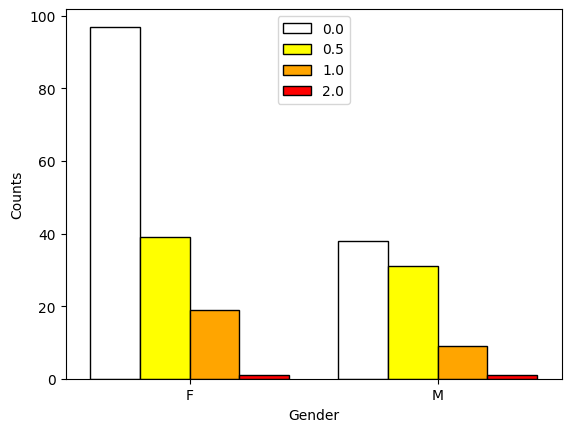

M/F
F    268
M    168
Name: count, dtype: int64


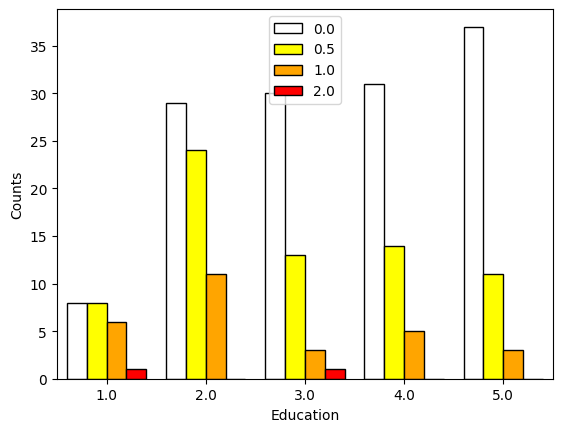

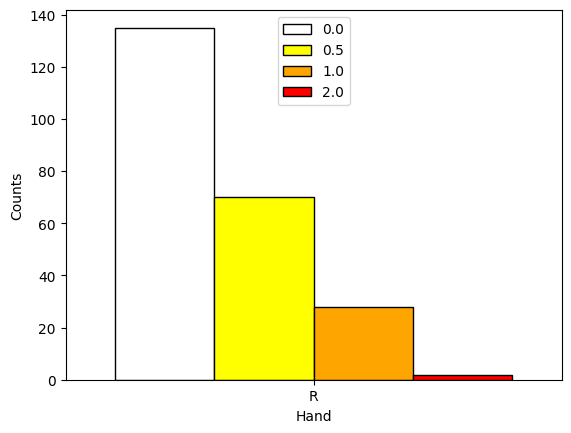

In [2]:
#Preprocessing A: Decide which Demographic Features to Drop + Which to Keep

#Drop ID because it is a categorical nominal value, and KNN cannot use this for classification
cross_sectional = cross_sectional.drop(columns = ['ID'])

print(cross_sectional.info())
        
#Drop SES because this feature is missing more than half of its values, and cannot be reliably used for 
#classification
cross_sectional = cross_sectional.drop(columns = ['SES'])

import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn Plot: Gender vs CDR
sns.countplot(x='M/F', hue = 'CDR', data=cross_sectional,
hue_order = [0.0, 0.5, 1.0, 2.0], palette = ['White','Yellow', 'Orange', 'Red'],
saturation = 1, edgecolor='black')
plt.legend(loc='upper center')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

#Is gender balanced? No. Cannot use gender because it will bias the algorithm.
print(cross_sectional['M/F'].value_counts())

#Seaborn Plot: Education vs CDR
sns.countplot(x='Educ', hue = 'CDR', data=cross_sectional,
hue_order = [0.0, 0.5, 1.0, 2.0], palette = ['White','Yellow', 'Orange', 'Red'],
saturation = 1, edgecolor='black')
plt.legend(loc='upper center')
plt.xlabel('Education')
plt.ylabel('Counts')
plt.show()

# Seaborn Plot: Hand vs CDR
sns.countplot(x='Hand', hue = 'CDR', data=cross_sectional,
hue_order = [0.0, 0.5, 1.0, 2.0], palette = ['White','Yellow', 'Orange', 'Red'],
saturation = 1, edgecolor='black')
plt.legend(loc='upper center')
plt.xlabel('Hand')
plt.ylabel('Counts')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     436 non-null    object 
 1   Hand    436 non-null    object 
 2   Age     436 non-null    int64  
 3   Educ    235 non-null    float64
 4   MMSE    235 non-null    float64
 5   CDR     235 non-null    float64
 6   eTIV    436 non-null    int64  
 7   nWBV    436 non-null    float64
 8   ASF     436 non-null    float64
 9   Delay   20 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 34.2+ KB
None


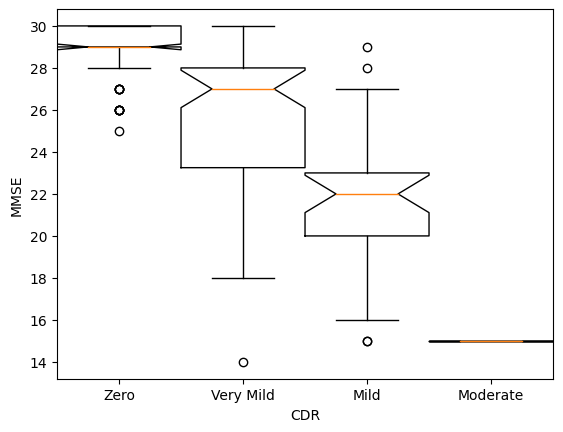

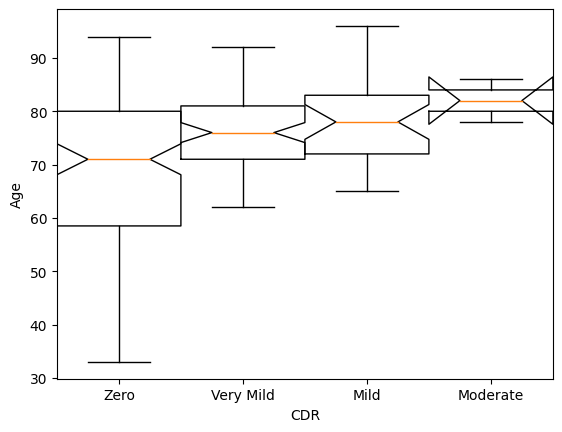

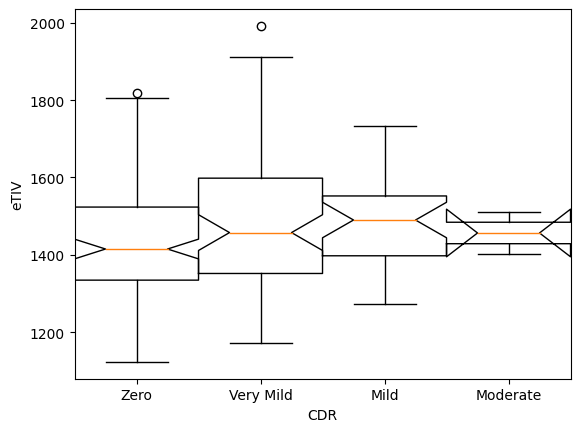

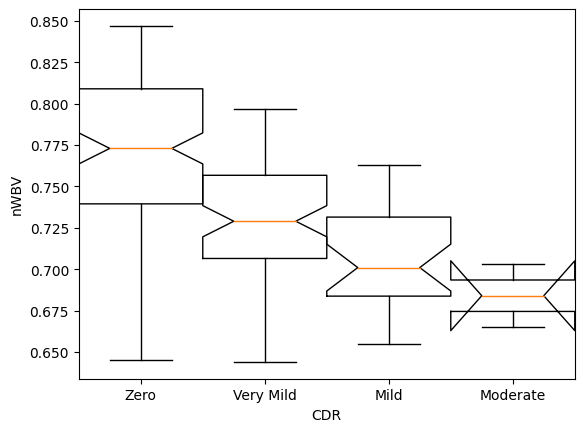

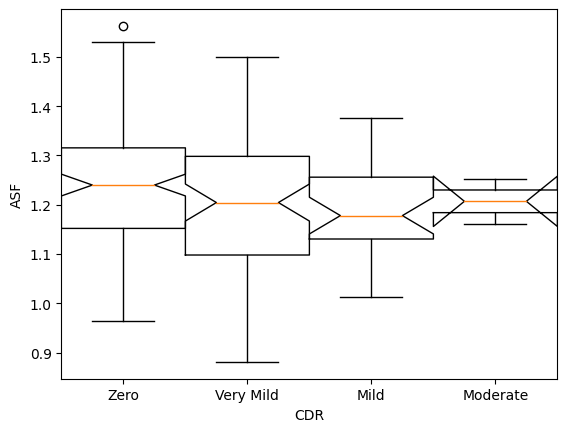

In [3]:
#Preprocessing A Cont'd

#Once again, we use the info function call to indicate which of our remaining variables are missing data
print(cross_sectional.info())

cross_sectional = cross_sectional.drop(columns = ['Delay'])

#Boxplot: MMSE vs CDR
Zero = cross_sectional[cross_sectional.CDR == 0.0]
VeryMild = cross_sectional[cross_sectional.CDR == 0.5]
Mild = cross_sectional[cross_sectional.CDR == 1.0]
Moderate = cross_sectional[cross_sectional.CDR == 2.0]
plt.boxplot([Zero.MMSE,VeryMild.MMSE, Mild.MMSE, Moderate.MMSE],notch=True,widths
=(1.0,1.0,1.0,1.0))
plt.xlabel('CDR')
plt.ylabel('MMSE')
plt.xticks([1,2,3,4],['Zero','Very Mild', 'Mild', 'Moderate'])
plt.show()

#Boxplot: Age vs CDR
Zero = cross_sectional[cross_sectional.CDR == 0.0]
VeryMild = cross_sectional[cross_sectional.CDR == 0.5]
Mild = cross_sectional[cross_sectional.CDR == 1.0]
Moderate = cross_sectional[cross_sectional.CDR == 2.0]
plt.boxplot([Zero.Age,VeryMild.Age, Mild.Age, Moderate.Age],notch=True,widths
=(1.0,1.0,1.0,1.0))
plt.xlabel('CDR')
plt.ylabel('Age')
plt.xticks([1,2, 3,4],['Zero','Very Mild', 'Mild', 'Moderate'])
plt.show()

#Boxplot: eTIV vs CDR
Zero = cross_sectional[cross_sectional.CDR == 0.0]
VeryMild = cross_sectional[cross_sectional.CDR == 0.5]
Mild = cross_sectional[cross_sectional.CDR == 1.0]
Moderate = cross_sectional[cross_sectional.CDR == 2.0]
plt.boxplot([Zero.eTIV,VeryMild.eTIV, Mild.eTIV, Moderate.eTIV],notch=True,widths
=(1.0,1.0,1.0,1.0))
plt.xlabel('CDR')
plt.ylabel('eTIV')
plt.xticks([1,2, 3,4],['Zero','Very Mild', 'Mild', 'Moderate'])
plt.show()

#Boxplot: nWBV vs CDR
Zero = cross_sectional[cross_sectional.CDR == 0.0]
VeryMild = cross_sectional[cross_sectional.CDR == 0.5]
Mild = cross_sectional[cross_sectional.CDR == 1.0]
Moderate = cross_sectional[cross_sectional.CDR == 2.0]
plt.boxplot([Zero.nWBV,VeryMild.nWBV, Mild.nWBV, Moderate.nWBV],notch=True,widths
=(1.0,1.0,1.0,1.0))
plt.xlabel('CDR')
plt.ylabel('nWBV')
plt.xticks([1,2, 3,4],['Zero','Very Mild', 'Mild', 'Moderate'])
plt.show()

#Boxplot: ASF vs CDR
Zero = cross_sectional[cross_sectional.CDR == 0.0]
VeryMild = cross_sectional[cross_sectional.CDR == 0.5]
Mild = cross_sectional[cross_sectional.CDR == 1.0]
Moderate = cross_sectional[cross_sectional.CDR == 2.0]
plt.boxplot([Zero.ASF,VeryMild.ASF, Mild.ASF, Moderate.ASF],notch=True,widths
=(1.0,1.0,1.0,1.0))
plt.xlabel('CDR')
plt.ylabel('ASF')
plt.xticks([1,2, 3,4],['Zero','Very Mild', 'Mild', 'Moderate'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     235 non-null    int64  
 1   Educ    235 non-null    float64
 2   MMSE    235 non-null    float64
 3   CDR     235 non-null    float64
 4   nWBV    235 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.0 KB
None


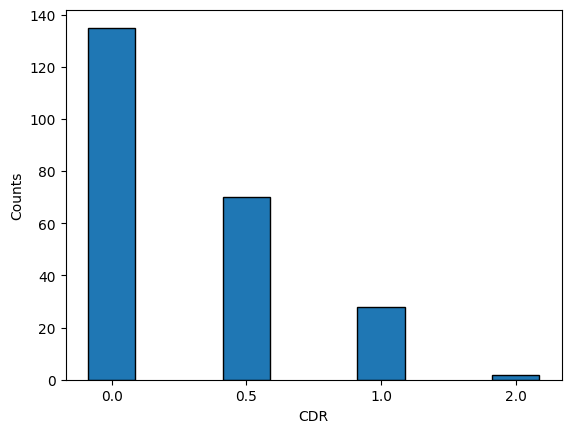

In [4]:
#Preprocessing B: Fill in or drop missing values

#Drop rows with missing CDR values since that's our target value
cross_sectional = cross_sectional.dropna(subset = ['CDR'])

# Drop features with low relationship to CDR 
cross_sectional = cross_sectional.drop(columns = ['M/F','Hand','ASF','eTIV'])

print(cross_sectional.info())

#Bar Chart for CDR
width = 0.35
x = [0, 1, 2, 3]
situation_counts=cross_sectional['CDR'].value_counts()
plt.bar(x, situation_counts , width, edgecolor = 'black')
plt.xticks(x, situation_counts.index)
plt.xlabel('CDR')
plt.ylabel('Counts')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(cross_sectional)

X = cross_sectional.drop('CDR', axis=1)
y = cross_sectional['CDR']

# Put CDR values into bins and assign labels
bins = [-0.1, 0.25, 0.75, 1.5, 2.1]
labels = ['0', '0.5', '1.0', '2.0']
y = pd.cut(y, bins=bins, labels=labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n = 5

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print(f"Classification Report for n = {n}:")
print(cr)

     Age  Educ  MMSE  CDR   nWBV
0     74   2.0  29.0  0.0  0.743
1     55   4.0  29.0  0.0  0.810
2     73   4.0  27.0  0.5  0.708
8     74   5.0  30.0  0.0  0.689
9     52   3.0  30.0  0.0  0.827
..   ...   ...   ...  ...    ...
411   70   1.0  29.0  0.5  0.748
412   73   3.0  23.0  0.5  0.730
413   61   2.0  28.0  0.0  0.825
414   61   5.0  30.0  0.0  0.780
415   62   3.0  26.0  0.0  0.766

[235 rows x 5 columns]
Accuracy: 0.72
Confusion Matrix:
[[25  5  0]
 [ 5  8  2]
 [ 1  0  1]]
Classification Report for n = 5:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
         0.5       0.62      0.53      0.57        15
         1.0       0.33      0.50      0.40         2

    accuracy                           0.72        47
   macro avg       0.59      0.62      0.60        47
weighted avg       0.73      0.72      0.72        47

